In [22]:
# load dataset
from pandas import read_csv
 
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values
 
data = load_file('UCI HAR Dataset/test/y_test.txt')
print(data.shape)

(2947, 1)


In [3]:
from numpy import dstack
from pandas import read_csv
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load the total acc data
filenames = ['UCI HAR Dataset/train/total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [4]:
# load dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load all train
trainX, trainy = load_dataset('train')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [ ]:
# summarize class balance
from numpy import array
from numpy import vstack
from pandas import read_csv
from pandas import DataFrame

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# summarize the balance of classes in an output variable column
def class_breakdown(data):
	# convert the numpy array into a dataframe
	df = DataFrame(data)
	# group data by the class value and calculate the number of rows
	counts = df.groupby(0).size()
	# retrieve raw rows
	counts = counts.values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

# load train file
trainy = load_file('UCI HAR Dataset/train/y_train.txt')
# summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)

# load test file
testy = load_file('test/y_test.txt')
# summarize class breakdown
print('Test Dataset')
class_breakdown(testy)

# summarize combined class breakdown
print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


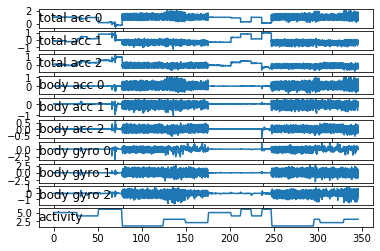

In [8]:
# plot all vars for one subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

D:\jupyter\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


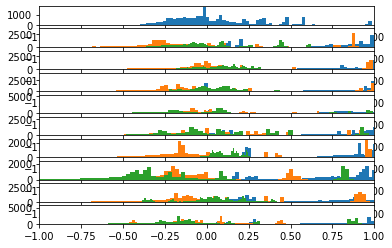

In [9]:
# plot histograms for multiple subjects
from numpy import array
from numpy import unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
# load a single file as a numpy array

def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# total acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,i]), bins=100)
	pyplot.show()

# load training dataset
X, y = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

D:\jupyter\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


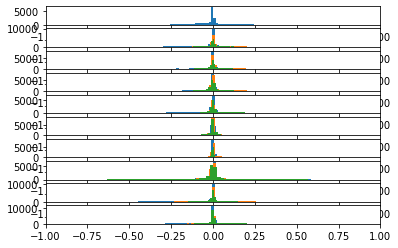

In [10]:
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# body acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,3+i]), bins=100)
	pyplot.show()
    # load training dataset
X, y = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

D:\jupyter\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


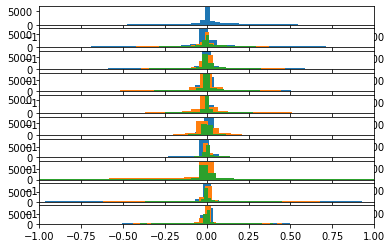

In [11]:
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# body acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,6+i]), bins=100)
	pyplot.show()
    # load training dataset
X, y = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

D:\jupyter\lib\site-packages\ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


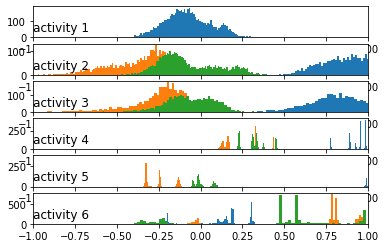

In [12]:
# plot histograms per activity for a subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
train_subjects = unique(sub_map)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot data for subject
plot_activity_histograms(subX, suby)

D:\jupyter\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


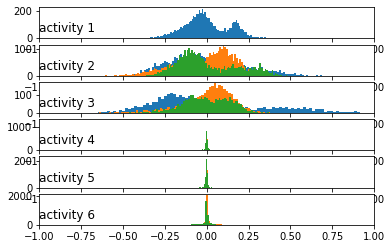

In [13]:
# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,3+i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()
# load data
trainX, trainy = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
train_subjects = unique(sub_map)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot data for subject
plot_activity_histograms(subX, suby)

D:\jupyter\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


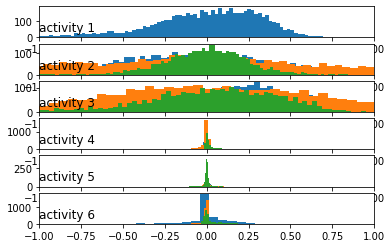

In [14]:
# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,6+i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()
trainX, trainy = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
train_subjects = unique(sub_map)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot data for subject
plot_activity_histograms(subX, suby)

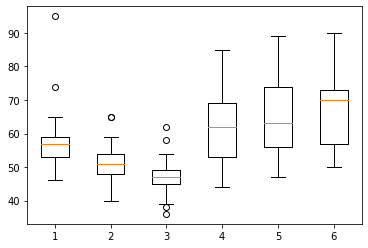

In [15]:
# plot durations of each activity by subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot activity durations by subject
def plot_activity_durations_by_subject(X, y, sub_map):
	# get unique subjects and activities
	subject_ids = unique(sub_map[:,0])
	activity_ids = unique(y[:,0])
	# enumerate subjects
	activity_windows = {a:list() for a in activity_ids}
	for sub_id in subject_ids:
		# get data for one subject
		_, subj_y = data_for_subject(X, y, sub_map, sub_id)
		# count windows by activity
		for a in activity_ids:
			activity_windows[a].append(len(subj_y[subj_y[:,0]==a]))
	# organize durations into a list of lists
	durations = [activity_windows[a] for a in activity_ids]
	pyplot.boxplot(durations, labels=activity_ids)
	pyplot.show()

# load training dataset
X, y = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
# plot durations
plot_activity_durations_by_subject(X, y, sub_map)

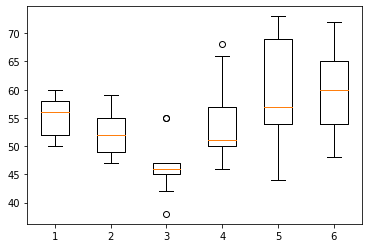

In [17]:
# load test dataset
X, y = load_dataset('test')
# load mapping of rows to subjects
sub_map = load_file('test/subject_test.txt')
# plot durations
plot_activity_durations_by_subject(X, y, sub_map)

In [426]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils import shuffle
from sklearn import linear_model


In [436]:
trainX = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_csv('UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

dickey = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING"}
dickey
acc=[] # for accuracy
prec=[] # for prec
rec=[] # recall
f1_score=[] 

In [437]:
mu = trainX.mean(axis=0)
mu1 = testX.mean(axis=0)
stdv = trainX.std(axis = 0)
stdv1 = testX.std(axis = 0)

X_train = (trainX - mu)/stdv   #normalized train set
X_test = (testX - mu1)/stdv1  #normalized test set
y_train = trainy              #train set of labels
y_test = testy               #test set of label 
y = np.array(y_train).ravel() #2d to 1 conversion

In [345]:
# Decision Tree Implementation

Training Accuracy of Decision Tree: 0.9351196953210011
Testing Accuracy of Decision Tree: 0.828978622327791


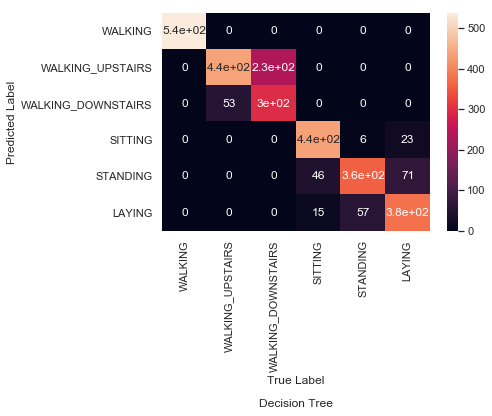

In [378]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
rank_classifier.fit(X_train,y)
Predictions_test = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)
TrainAccuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)
TestAccuracy = accuracy_score(y_true = y_test, y_pred = Predictions_test)

print("Training Accuracy of Decision Tree: {}".format(TrainAccuracy))
print("Testing Accuracy of Decision Tree: {}".format(TestAccuracy))

yy = list(map(str, Predictions_test))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(y_test1,pred1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
df_cm.index = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
sn.set(font_scale=1)#for label size
sn.heatmap(array.T, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.xlabel('True Label\n\nDecision Tree')
plt.ylabel('Predicted Label')
plt.show()

In [347]:
df_cm # dataframe of Decision Tree

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,537,0,0,0,0,0
WALKING_UPSTAIRS,0,438,53,0,0,0
WALKING_DOWNSTAIRS,0,233,299,0,0,0
SITTING,0,0,0,435,46,15
STANDING,0,0,0,6,357,57
LAYING,0,0,0,23,71,377


In [348]:
prec_dec=[]
rec_dec=[]
for label in range(len(array)):
    row = array[label, :]
    num1=array[label, label] / row.sum()
    rec_dec.append(num1)
    col = array[:, label]
    num2=array[label, label] / col.sum()
    prec_dec.append(num2)
#     print(f"{label:5d} {num1:9.3f} {num2:6.3f}")

prec_1=sum(prec_dec)/6
prec.append(prec_1)

rec_1 = sum(rec_dec)/6
rec.append(rec_1)
    
diagonal_sum = array.trace()
sum_of_all_elements = array.sum()
acc1=diagonal_sum / sum_of_all_elements
print("\nAccuracy: ",acc1)
acc.append(acc1)

f1_dec = 2*(prec_1*rec_1)/(prec_1+rec_1)
f1_score.append(f1_dec)

d={'Activities':['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],'Precision':prec_dec,'Recall':rec_dec}
met_df=pd.DataFrame(d)
met_df



Accuracy:  0.828978622327791


,Activities,Precision,Recall
0,LAYING,1.000000,1.000000
1,SITTING,0.652757,0.892057
2,STANDING,0.849432,0.562030
3,WALKING,0.937500,0.877016
4,WALKING_DOWNSTAIRS,0.753165,0.850000
5,WALKING_UPSTAIRS,0.839644,0.800425


In [349]:
# f1_dec = 2*(prec_1*rec_1)/(prec_1+rec_1)
# f1_score.append(f1_dec)

In [350]:
# K Neearest Neighbors

In [419]:
from sklearn import neighbors
import numpy as np
Accuracy_KNN = np.array([])
rangeli = list(range(3,10))
for i in rangeli:                            #iterating through different k values
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y)
    predicted_knn = knn.predict(X_test)
    Accuracy = accuracy_score(y_true = y_test, y_pred = predicted_knn)
    Accuracy_KNN = np.append(Accuracy_KNN, Accuracy)
trained_knn = knn.predict(X_train)
Trained= accuracy_score(y_true = y_train, y_pred = trained_knn)
print("Training Accuracy of KNN: {}".format((Trained)))
print("Testing Accuracy of KNN: {}".format(max(Accuracy_KNN)))

Training Accuracy of KNN: 0.9749727965179543
Testing Accuracy of KNN: 0.8965049202578894


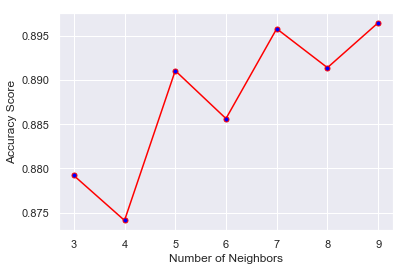

In [352]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(3,10)
plt.plot(rangeli, Accuracy_KNN, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [353]:
print("Optimal K value is {}".format(rangeli[np.argmax(Accuracy_KNN)]))
# print("Accuracy of Optimum K value is {[]}".format(np.max(Accuracy_KNN)))

Optimal K value is 9


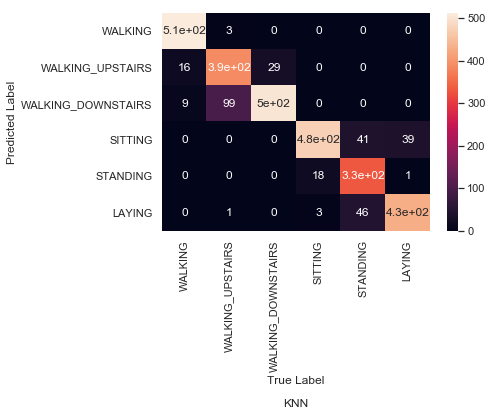

In [379]:
predicted_knn = knn.predict(X_test)
yy = list(map(str, predicted_knn))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))
array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
df_cm.index = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]

#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.xlabel('True Label\n\nKNN')
plt.ylabel('Predicted Label')
plt.show()

In [355]:
df_cm

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,512,3,0,0,0,0
WALKING_UPSTAIRS,16,388,29,0,0,0
WALKING_DOWNSTAIRS,9,99,503,0,0,0
SITTING,0,0,0,475,41,39
STANDING,0,0,0,18,333,1
LAYING,0,1,0,3,46,431


In [356]:
prec_KNN = []
rec_KNN = []

for label in range(len(array)):
    row = array[label, :]
    num1=array[label, label] / row.sum()
    rec_KNN.append(num1)
    col = array[:, label]
    num2=array[label, label] / col.sum()
    prec_KNN.append(num2)
#     print(f"{num1:9.3f} {num2:6.3f}")

prec_2=sum(prec_KNN)/6
prec.append(prec_2)

rec2=sum(rec_KNN)/6
rec.append(rec_2)

diagonal_sum = array.trace()
sum_of_all_elements = array.sum()
acc2=diagonal_sum / sum_of_all_elements
print("\nAccuracy: ",acc2)
acc.append(acc2)

f1_KNN = 2*(prec_2*rec_2)/(prec_2 + rec_2)
f1_score.append(f1_KNN)

d={'Activities':['LAYING','SITTING','STANDING','WALKING','WALKING DOWNSTAIRS','WALKING UPSTAIRS'],'Precision':prec_KNN,'Recall':rec_KNN}
met_df=pd.DataFrame(d)
met_df


Accuracy:  0.8965049202578894


,Activities,Precision,Recall
0,LAYING,0.953445,0.994175
1,SITTING,0.790224,0.896074
2,STANDING,0.945489,0.823241
3,WALKING,0.957661,0.855856
4,WALKING DOWNSTAIRS,0.792857,0.946023
5,WALKING UPSTAIRS,0.915074,0.896050


In [357]:
# f1_KNN = 2*(prec_2*rec_2)/(prec_2 + rec_2)
# f1_score.append(f1_KNN)

In [358]:
# Support Vector Machine

In [394]:
from sklearn.svm import SVC# Support vector classifier
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score

clf = SVC(kernel="linear")
clf.fit(X_train, y_train.values.ravel()) 
predsvm = clf.predict(X_test)
TestAccuracy = accuracy_score(y_true = y_test, y_pred = predsvm)
accuracy_score(y_true = y_test, y_pred = predsvm)
predsvm = clf.predict(X_train)
acc3=accuracy_score(y_true = y_train, y_pred = predsvm)
print("training accuracy is ",acc3)
print("testing accuracy is ",TestAccuracy)

training accuracy is  0.9968715995647442
testing accuracy is  0.9623345775364778


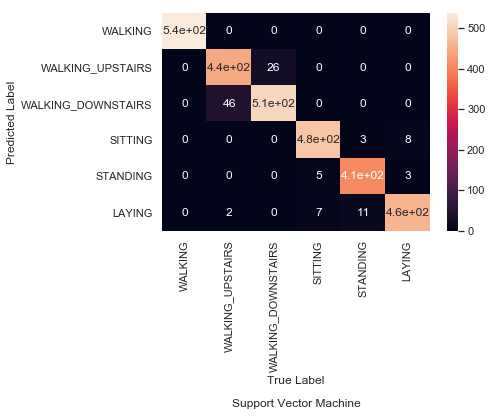

In [395]:
predsvm = clf.predict(X_test)
yy = list(map(str, predsvm))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))
array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
df_cm.index = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.xlabel('True Label\n\nSupport Vector Machine')
plt.ylabel('Predicted Label')
plt.show()


In [396]:
df_cm

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,537,0,0,0,0,0
WALKING_UPSTAIRS,0,443,26,0,0,0
WALKING_DOWNSTAIRS,0,46,506,0,0,0
SITTING,0,0,0,484,3,8
STANDING,0,0,0,5,406,3
LAYING,0,2,0,7,11,460


In [397]:
prec_svm = []
rec_svm = []
for label in range(len(array)):
    row = array[label, :]
    num1=array[label, label] / row.sum()
    rec_svm.append(num1)
    col = array[:, label]
    num2=array[label, label] / col.sum()
    prec_svm.append(num2)
#     print(f"{label:5d} {num1:9.3f} {num2:6.3f}")

prec_2=sum(prec_svm)/6
prec.append(prec_2)

rec3=sum(rec_svm)/6
rec.append(rec_3)
    
diagonal_sum = array.trace()
sum_of_all_elements = array.sum()
acc3=diagonal_sum / sum_of_all_elements
print("\nTesting Accuracy: ",acc3)
acc.append(acc3)

f1_svm = 2*(prec_3*rec_3)/(prec_3 + rec_3)
f1_score.append(f1_svm)

d={'Activities':['LAYING','SITTING','STANDING','WALKING','WALKING DOWNSTAIRS','WALKING UPSTAIRS'],'Precision':prec_svm,'Recall':rec_svm}
met_df=pd.DataFrame(d)
met_df



Testing Accuracy:  0.9623345775364778


,Activities,Precision,Recall
0,LAYING,1.000000,1.000000
1,SITTING,0.902240,0.944563
2,STANDING,0.951128,0.916667
3,WALKING,0.975806,0.977778
4,WALKING DOWNSTAIRS,0.966667,0.980676
5,WALKING UPSTAIRS,0.976645,0.958333


In [363]:
d={'Modelling Algo':['Desicion Tree','KNN','SVC'],'Accuracy':acc,'Precision':prec,'Recall':rec,'F1 Score':f1_score}
met_df=pd.DataFrame(d)
met_df
# print(acc,'\n', prec,'\n',rec,'\n', f1_score)

,Modelling Algo,Accuracy,Precision,Recall,F1 Score
0,Desicion Tree,0.828979,0.838750,0.830255,0.834480
1,KNN,0.896505,0.892458,0.838750,0.864771
2,SVC,0.986670,0.955841,0.955841,0.956019


CONCLUSION : SVM is better among all.

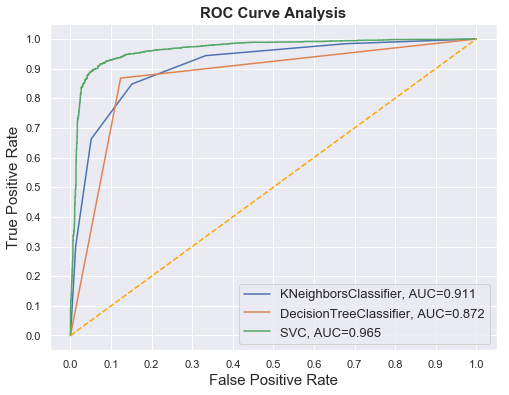

In [439]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=10000, n_features=100, n_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234)

# Import the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1),
               SVC(probability=True)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()